In [5]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import filtfilt
from src.iaf.simulation import Simulation

fpath = Path("configs/basic_ica.yaml")
# fpath = Path("configs/single_source_corrs.yaml")

sim = Simulation.from_yaml(fpath)

In [8]:
out = sim.run(duration=1000)

100%|██████████| 1000/1000 [01:42<00:00,  9.74it/s]


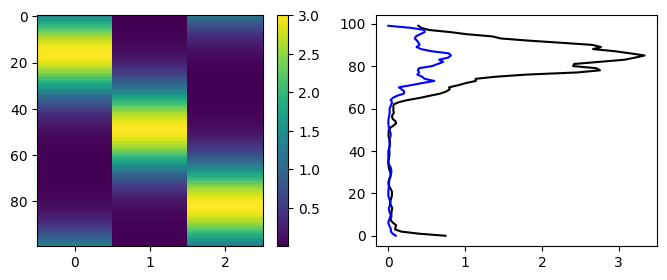

In [9]:
plt.figure(1, figsize=(8, 3))

plt.subplot(1, 2, 1)
im = plt.imshow(sim.source_populations["excitatory"].source_loading.T, aspect='auto', interpolation="none")
plt.colorbar(im)

plt.subplot(1, 2, 2)
smooth_factor = round(sim.source_populations["excitatory"].num_inputs/sim.source_populations["excitatory"].num_signals/10)
max_weight = sim.neuron.synapse_groups["basal"].max_weight
kernel = np.ones(smooth_factor) / smooth_factor
saw = filtfilt(kernel, 1, out["weights"]["basal"][-1])
plt.plot(saw/max_weight, range(sim.source_populations["excitatory"].num_inputs-1, -1, -1), 'k', linewidth=1.5, label="High DP")

smooth_factor = round(sim.source_populations["excitatory"].num_inputs/sim.source_populations["excitatory"].num_signals/10)
max_weight = sim.neuron.synapse_groups["apical"].max_weight
kernel = np.ones(smooth_factor) / smooth_factor
saw = filtfilt(kernel, 1, out["weights"]["apical"][-1])
plt.plot(saw/max_weight, range(sim.source_populations["excitatory"].num_inputs-1, -1, -1), 'b', linewidth=1.5, label="Low DP")

plt.show()

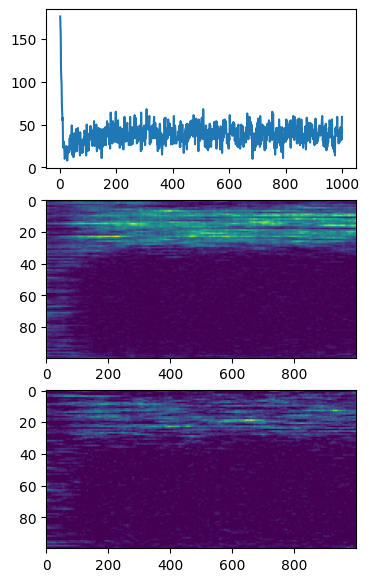

In [10]:
# Create spike train and PSTH
duration = out["weights"]["basal"].shape[0]
NT = int(duration / sim.dt)
dt = sim.dt
psth_window = 1  # in seconds
dpsth = round(psth_window/dt)
spikes = np.zeros(NT)
spikes[out["spike_times"]] = 1
psth = np.sum(spikes.reshape(-1, dpsth), axis=1)/psth_window
tvec = np.arange(NT) * dt + dt

# Create plots
plt.figure(1, figsize=(4, 7))
plt.subplot(3, 1, 1)
plt.plot(range(1, len(psth) + 1), psth)
plt.subplot(3, 1, 2)
plt.imshow(out["weights"]["basal"].T, aspect='auto')
plt.subplot(3, 1, 3)
plt.imshow(out["weights"]["apical"].T, aspect='auto')
plt.show()